In [ ]:
import pandas as pd

data = pd.read_csv("C:/Users/saksh/Downloads/train.csv")
print(data.shape)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [22]:
data = pd.read_csv("C:/Users/saksh/Downloads/train.csv")
print(data.shape)
data.head(10)
data.isnull().sum()
data.drop(columns=["LotFrontage"],inplace=True)
data.isnull().sum()


(1460, 81)


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [24]:
data = pd.read_csv("C:/Users/saksh/Downloads/train.csv")
print(data.shape)
data.head(10)
data["LotFrontage"].mean()

(1460, 81)


np.float64(70.04995836802665)

In [59]:
data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].mean())


In [60]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [72]:
y = data["SalePrice"]

X = data[[
    "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
    "LotShape", "LandContour", "MoSold", "YrSold", 
    "SaleType", "SaleCondition"
]]

X = pd.get_dummies(X, drop_first=True)  # Convert categories to numbers
X = X.fillna(X.mean())                  # Fill any missing values


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [74]:
data. isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [77]:
y_pred = model.predict(X_test)

# Accuracy metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


R² Score: 0.3549441236403794
MSE: 4947788993.541256
RMSE: 70340.52170364716


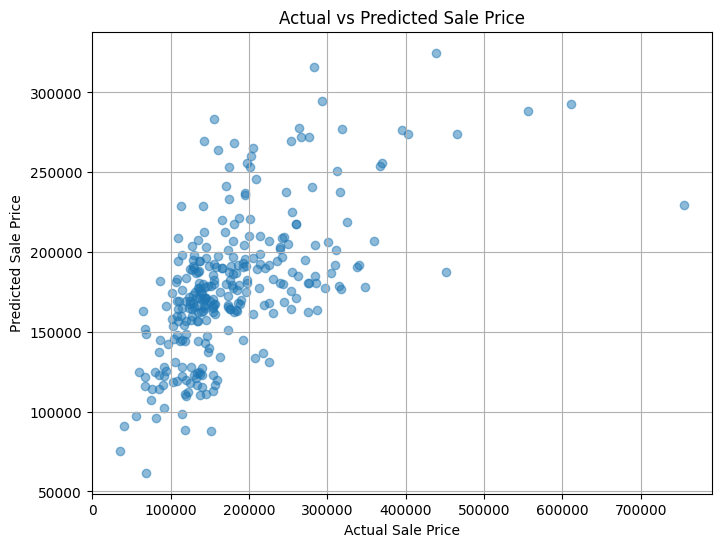

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.grid(True)
plt.show()


In [79]:
# Prepare new input
new_house = pd.DataFrame([{
    "MSSubClass": 60,
    "MSZoning": "RL",
    "LotFrontage": 70.0,
    "LotArea": 8500,
    "LotShape": "Reg",
    "LandContour": "Lvl",
    "MoSold": 6,
    "YrSold": 2009,
    "SaleType": "WD",
    "SaleCondition": "Normal"
}])

# Convert same way as training data
new_house = pd.get_dummies(new_house)
new_house = new_house.reindex(columns=X.columns, fill_value=0)

# Predict price
predicted_price = model.predict(new_house)
print("Predicted Sale Price:", predicted_price[0])


Predicted Sale Price: 172395.1588532105


In [80]:
from sklearn.metrics import r2_score, mean_squared_error

# R² score
r2 = r2_score(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = mse ** 0.5

# Approximate accuracy (optional)
mean_price = y_test.mean()
mae = abs(y_test - y_pred).mean()
accuracy = 100 - (mae / mean_price * 100)

# Print results
print("📊 R² Score      :", round(r2, 4))
print("📉 MSE           :", round(mse, 2))
print("📏 RMSE          :", round(rmse, 2))
print("✅ Approx Accuracy:", round(accuracy, 2), "%")


📊 R² Score      : 0.3549
📉 MSE           : 4947788993.54
📏 RMSE          : 70340.52
✅ Approx Accuracy: 72.71 %


In [81]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [84]:
# R² Score
r2 = r2_score(y_test, y_pred)

# MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Approximate accuracy
mae = abs(y_test - y_pred).mean()
mean_price = y_test.mean()
accuracy = 100 - (mae / mean_price * 100)

# Show results
print("📊 R² Score      :", round(r2, 4))
print("📉 MSE           :", round(mse, 2))
print("📏 RMSE          :", round(rmse, 2))
print("✅ Approx Accuracy:", round(accuracy, 2), "%")


📊 R² Score      : 0.5172
📉 MSE           : 3703463889.77
📏 RMSE          : 60856.09
✅ Approx Accuracy: 77.75 %


In [85]:
X = data[[
    "LotArea", "LotFrontage", "GrLivArea", "OverallQual",
    "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"
]]


In [86]:
X = X.fillna(X.mean())  # Fill missing values with mean


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

y = data["SalePrice"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [89]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = abs(y_test - y_pred).mean()
accuracy = 100 - (mae / y_test.mean() * 100)

print("📊 R² Score      :", round(r2, 4))
print("📉 MSE           :", round(mse, 2))
print("📏 RMSE          :", round(rmse, 2))
print("✅ Approx Accuracy:", round(accuracy, 2), "%")


📊 R² Score      : 0.8799
📉 MSE           : 921153778.39
📏 RMSE          : 30350.52
✅ Approx Accuracy: 89.49 %


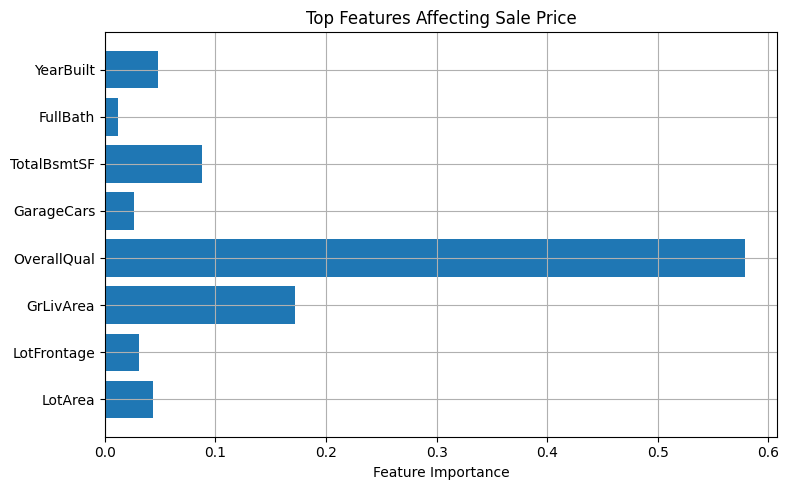

In [90]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Top Features Affecting Sale Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
import joblib
joblib.dump(model, "house_price_model.pkl")


['house_price_model.pkl']

In [92]:
print(data.columns.tolist())


['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

C:\Users\saksh\AppData\Local\Temp\ipykernel_24872\3545316641.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saksh\AppData\Local\Temp\ipykernel_24872\3545316641.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("actual_vs_predicted.png")  # ✅ Save as image
c:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


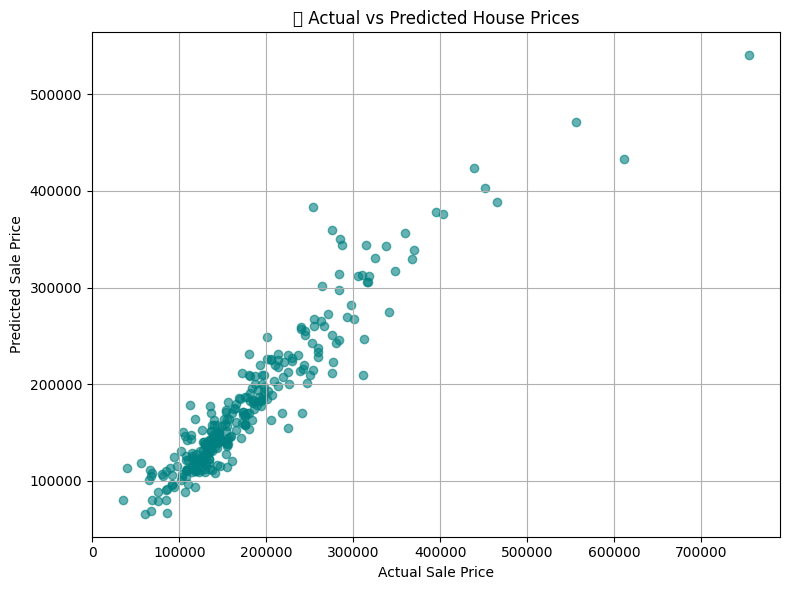

In [93]:
import matplotlib.pyplot as plt

# Example: Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("📈 Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.savefig("actual_vs_predicted.png")  # ✅ Save as image
plt.show()


In [94]:
import pandas as pd

results = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

# Save a few rows to image or Excel
results.head(10).to_csv("sample_predictions.csv", index=False)
